# **Heart Disease Prediction project**


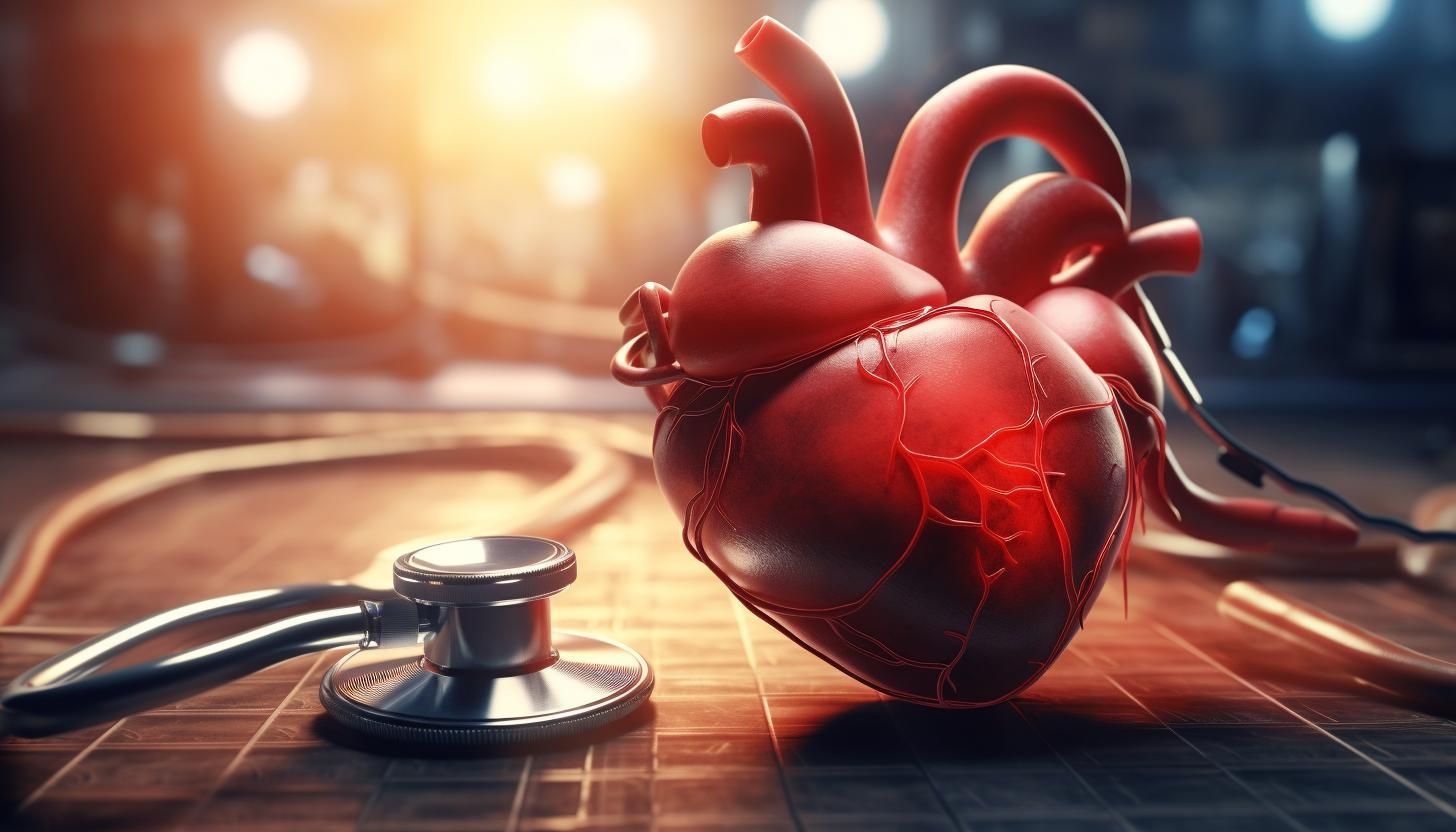

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **The primary objective of this project is to build and evaluate machine learning models for predicting the presence of heart disease based on a given set of features such as age, sex, blood pressure, cholesterol levels, and other relevant medical data. The goal is to achieve high accuracy while prioritizing sensitivity (recall) to minimize the risk of misdiagnosing individuals with heart disease.**

**Cardiovascular diseases (CVDs) are a leading cause of death globally, and early detection plays a crucial role in improving patient outcomes. Machine learning techniques can be leveraged to analyze various medical parameters and predict the presence or absence of heart disease with high accuracy. This project aims to develop a predictive model that can assist healthcare professionals in identifying individuals at risk of heart disease.**

## **Dataset:**

**The project will utilize the Heart Disease Dataset from the UCI Machine Learning Repository. This dataset contains 14 features and a binary target variable indicating the presence or absence of heart disease. The features include:**
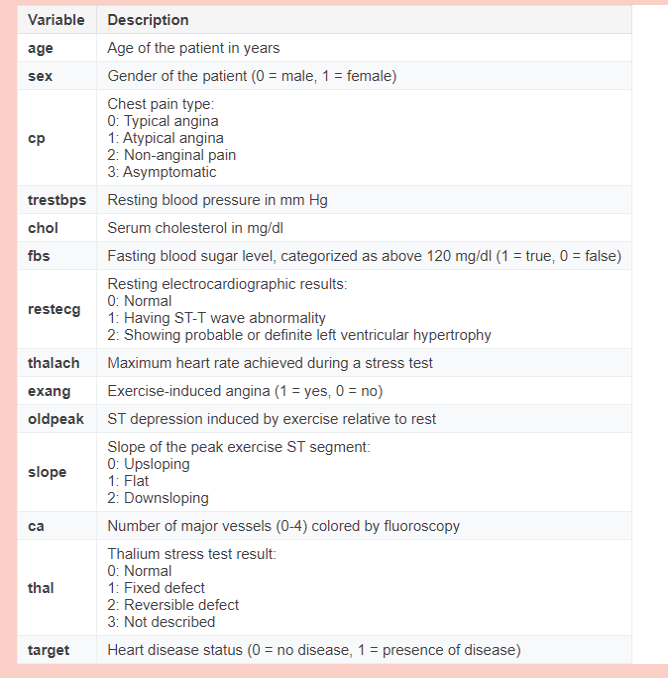

# **Step 1 | Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import boxcox, boxcox_normmax
from scipy.special import boxcox1p
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#**Step 2 | Read Dataset**

In [ ]:
data = pd.read_csv('/content/heart_disease.csv')
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

# **Step 3 | Dataset Overview**

## **Data Preprocessing**

In [ ]:
print('Shape of the data is: ', data.shape)


Shape of the data is:  (1025, 14)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data=data.rename(
    columns ={"cp":"chest pain type",
              "trestbps":"resting blood pressure",
               "chol": "serum cholesterol level",
               "fbs":"fasting blood sugar",
               "restecg ":"resting electrocardiographic results",
               "thalach":"max_heart_rate_achieved",
               "exang": "exercise_induced_angina",
               "oldpeak":"ST depression",
               "slope": "st_slope",
               "ca":"num_major_vessels",
               "thal":"thalassemia"})
data

age  sex  chest pain type  resting blood pressure  \
0      52    1                0                     125   
1      53    1                0                     140   
2      70    1                0                     145   
3      61    1                0                     148   
4      62    0                0                     138   
...   ...  ...              ...                     ...   
1020   59    1                1                     140   
1021   60    1                0                     125   
1022   47    1                0                     110   
1023   50    0                0                     110   
1024   54    1                0                     120   

      serum cholesterol level  fasting blood sugar  restecg  \
0                         212                    0        1   
1                         203                    1        0   
2                         174                    0        1   
3                         203                    0        1   
4                         294                    1        1   
...                       ...                  ...      ...   
1020                      221                    0        1   
1021                      258                    0        0   
1022                      275                    0        0   
1023                      254                    0        0   
1024                      188                    0        1   

      max_heart_rate_achieved  exercise_induced_angina  ST depression  \
0                         168                        0            1.0   
1                         155                        1            3.1   
2                         125                        1            2.6   
3                         161                        0            0.0   
4                         106                        0            1.9   
...                       ...                      ...            ...   
1020                      164                        1            0.0   
1021                      141                        1            2.8   
1022                      118                        1            1.0   
1023                      159                        0            0.0   
1024                      113                        0            1.4   

      st_slope  num_major_vessels  thalassemia  target  
0            2                  2            3       0  
1            0                  0            3       0  
2            0                  0            3       0  
3            2                  1            3       0  
4            1                  3            2       0  
...        ...                ...          ...     ...  
1020         2                  0            2       1  
1021         1                  1            3       0  
1022         1                  1            2       0  
1023         2                  0            2       1  
1024         1                  1            3       0  

[1025 rows x 14 columns]

In [ ]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholesterol level', 'fasting blood sugar', 'restecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'ST depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
data.dtypes

age                          int64
sex                          int64
chest pain type              int64
resting blood pressure       int64
serum cholesterol level      int64
fasting blood sugar          int64
restecg                      int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
ST depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [ ]:
data.nunique()

age                         41
sex                          2
chest pain type              4
resting blood pressure      49
serum cholesterol level    152
fasting blood sugar          2
restecg                      3
max_heart_rate_achieved     91
exercise_induced_angina      2
ST depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
target                       2
dtype: int64

In [ ]:
data["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
df=data.corr()
df

age       sex  chest pain type  \
age                      1.000000 -0.103240        -0.071966   
sex                     -0.103240  1.000000        -0.041119   
chest pain type         -0.071966 -0.041119         1.000000   
resting blood pressure   0.271121 -0.078974         0.038177   
serum cholesterol level  0.219823 -0.198258        -0.081641   
fasting blood sugar      0.121243  0.027200         0.079294   
restecg                 -0.132696 -0.055117         0.043581   
max_heart_rate_achieved -0.390227 -0.049365         0.306839   
exercise_induced_angina  0.088163  0.139157        -0.401513   
ST depression            0.208137  0.084687        -0.174733   
st_slope                -0.169105 -0.026666         0.131633   
num_major_vessels        0.271551  0.111729        -0.176206   
thalassemia              0.072297  0.198424        -0.163341   
target                  -0.229324 -0.279501         0.434854   

                         resting blood pressure  serum cholesterol level  \
age                                    0.271121                 0.219823   
sex                                   -0.078974                -0.198258   
chest pain type                        0.038177                -0.081641   
resting blood pressure                 1.000000                 0.127977   
serum cholesterol level                0.127977                 1.000000   
fasting blood sugar                    0.181767                 0.026917   
restecg                               -0.123794                -0.147410   
max_heart_rate_achieved               -0.039264                -0.021772   
exercise_induced_angina                0.061197                 0.067382   
ST depression                          0.187434                 0.064880   
st_slope                              -0.120445                -0.014248   
num_major_vessels                      0.104554                 0.074259   
thalassemia                            0.059276                 0.100244   
target                                -0.138772                -0.099966   

                         fasting blood sugar   restecg  \
age                                 0.121243 -0.132696   
sex                                 0.027200 -0.055117   
chest pain type                     0.079294  0.043581   
resting blood pressure              0.181767 -0.123794   
serum cholesterol level             0.026917 -0.147410   
fasting blood sugar                 1.000000 -0.104051   
restecg                            -0.104051  1.000000   
max_heart_rate_achieved            -0.008866  0.048411   
exercise_induced_angina             0.049261 -0.065606   
ST depression                       0.010859 -0.050114   
st_slope                           -0.061902  0.086086   
num_major_vessels                   0.137156 -0.078072   
thalassemia                        -0.042177 -0.020504   
target                             -0.041164  0.134468   

                         max_heart_rate_achieved  exercise_induced_angina  \
age                                    -0.390227                 0.088163   
sex                                    -0.049365                 0.139157   
chest pain type                         0.306839                -0.401513   
resting blood pressure                 -0.039264                 0.061197   
serum cholesterol level                -0.021772                 0.067382   
fasting blood sugar                    -0.008866                 0.049261   
restecg                                 0.048411                -0.065606   
max_heart_rate_achieved                 1.000000                -0.380281   
exercise_induced_angina                -0.380281                 1.000000   
ST depression                          -0.349796                 0.310844   
st_slope                                0.395308                -0.267335   
num_major_vessels                      -0.207888                 0.107849   
thalassemia                            -0.098068        

### **Type Casting(conversion)**

In [ ]:
columns_to_convert = [
    "sex",
    "chest pain type",
    "fasting blood sugar",
    "restecg",
    "exercise_induced_angina",
    "st_slope",
    "num_major_vessels",
    "thalassemia",
    "target"
]
data[columns_to_convert]=data[columns_to_convert].astype(str)
print(data.dtypes)

age                          int64
sex                         object
chest pain type             object
resting blood pressure       int64
serum cholesterol level      int64
fasting blood sugar         object
restecg                     object
max_heart_rate_achieved      int64
exercise_induced_angina     object
ST depression              float64
st_slope                    object
num_major_vessels           object
thalassemia                 object
target                      object
dtype: object


### **Checking null(missing) Values**

In [ ]:
data.isnull().sum()

age                        0
sex                        0
chest pain type            0
resting blood pressure     0
serum cholesterol level    0
fasting blood sugar        0
restecg                    0
max_heart_rate_achieved    0
exercise_induced_angina    0
ST depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [ ]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
categorical_features = data.select_dtypes(include=['object'])

### **Summary Statistics for Numerical Variables**

In [ ]:
data.describe().T

count        mean        std    min    25%    50%  \
age                      1025.0   54.434146   9.072290   29.0   48.0   56.0   
resting blood pressure   1025.0  131.611707  17.516718   94.0  120.0  130.0   
serum cholesterol level  1025.0  246.000000  51.592510  126.0  211.0  240.0   
max_heart_rate_achieved  1025.0  149.114146  23.005724   71.0  132.0  152.0   
ST depression            1025.0    1.071512   1.175053    0.0    0.0    0.8   

                           75%    max  
age                       61.0   77.0  
resting blood pressure   140.0  200.0  
serum cholesterol level  275.0  564.0  
max_heart_rate_achieved  166.0  202.0  
ST depression              1.8    6.2

### **Summary Statistics for Categorical Variables**

In [ ]:
data.describe(include="object").T

count unique top freq
sex                      1025      2   1  713
chest pain type          1025      4   0  497
fasting blood sugar      1025      2   0  872
restecg                  1025      3   1  513
exercise_induced_angina  1025      2   0  680
st_slope                 1025      3   1  482
num_major_vessels        1025      5   0  578
thalassemia              1025      4   2  544
target                   1025      2   1  526

# **Step 4 | Exploratory Data Analysis**

### **Plot the correlation heatmap**

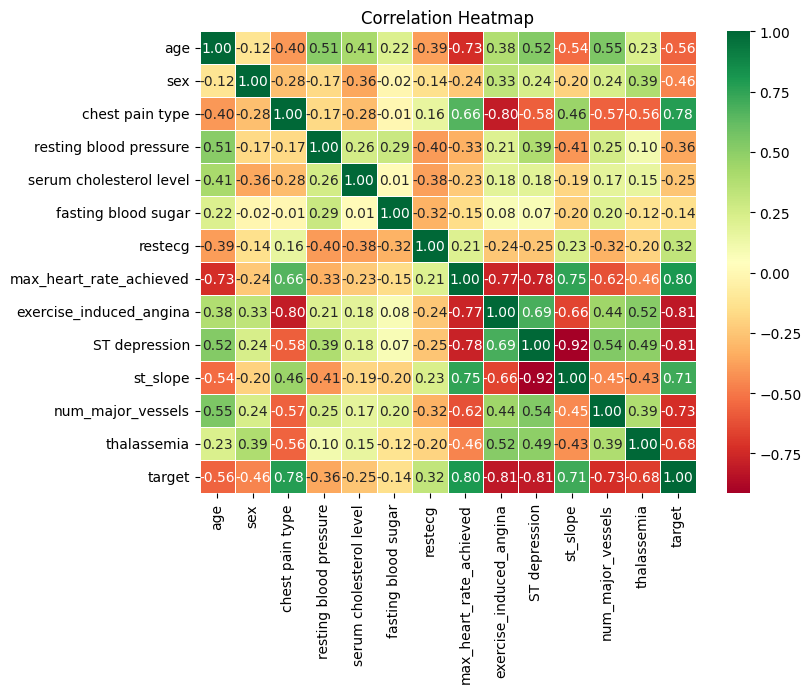

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap( df.corr(),annot=True, fmt=".2f",linewidths=.5,cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

### **PairPlot for Numerical Features**

<Figure size 1000x800 with 0 Axes>

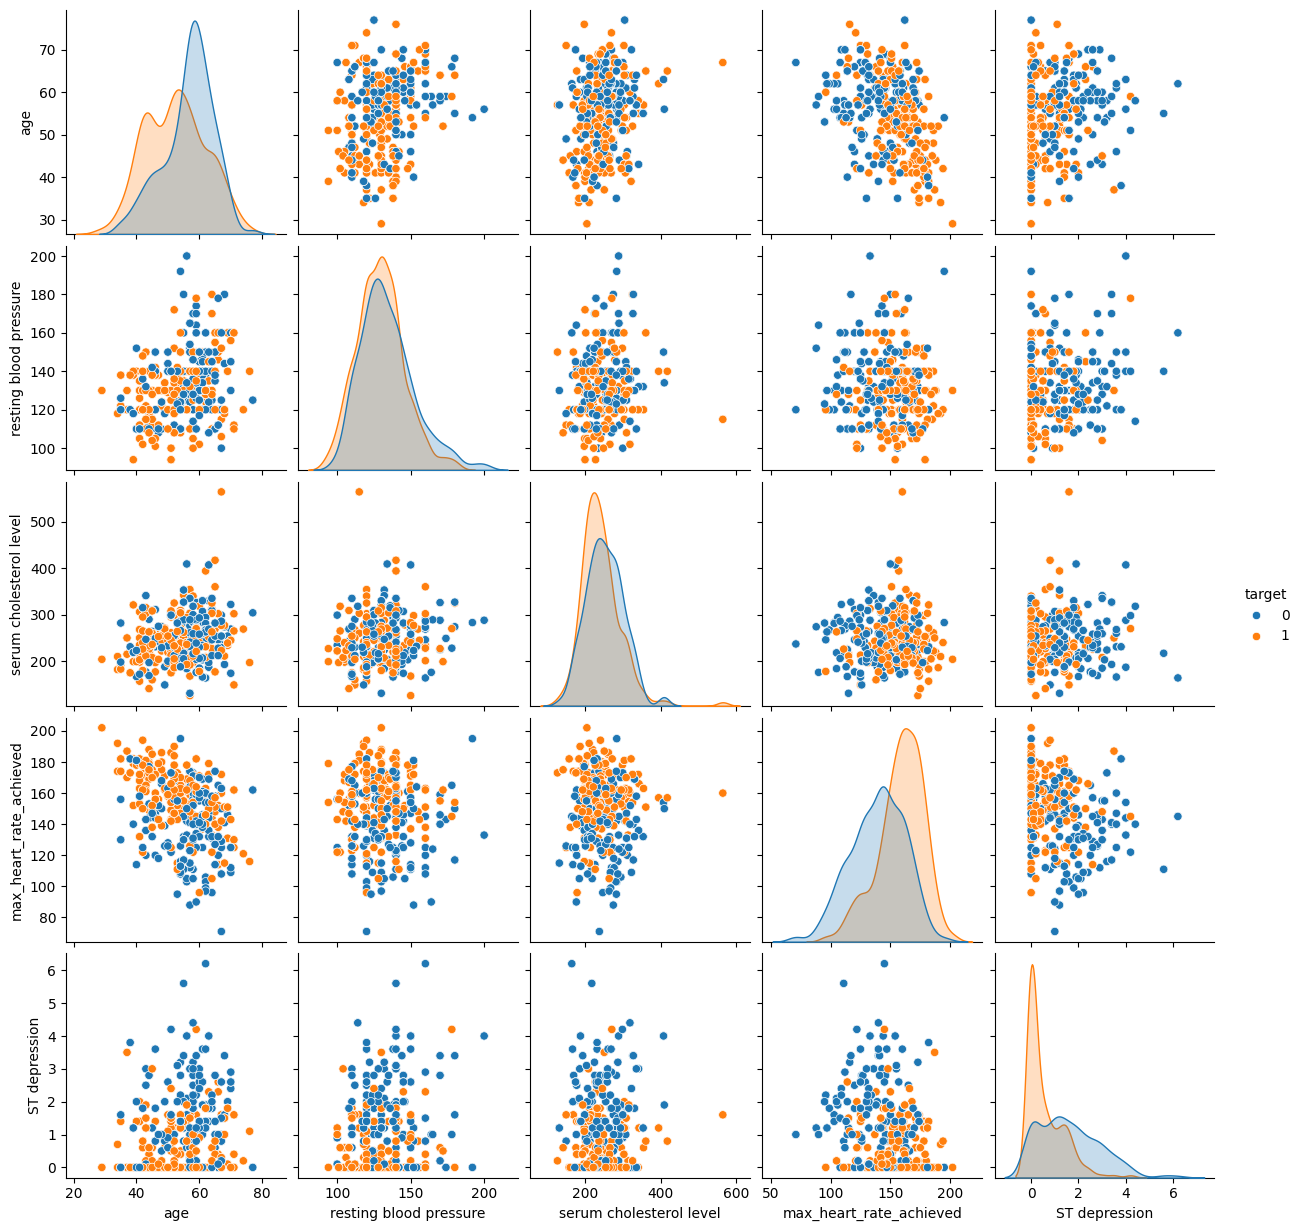

In [ ]:
plt.figure(figsize=(10, 8))
sel=["age","resting blood pressure","serum cholesterol level","max_heart_rate_achieved","ST depression","target"]
sns.pairplot(data[sel],hue='target')
plt.show()


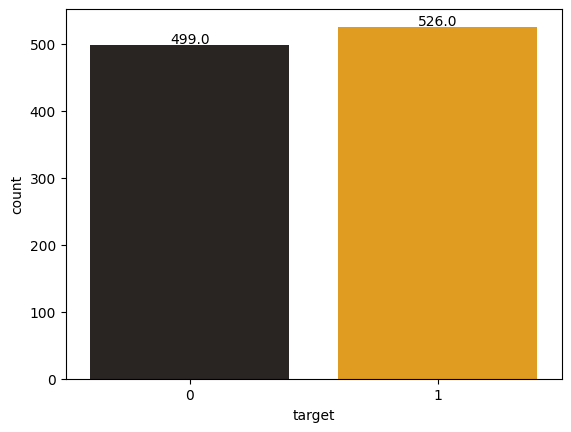

In [ ]:
total = float(len(data))
ax = sns.countplot(x='target', data=data, hue='target',color='orange')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f}'.format(height), ha="center")


plt.show()

## **Univariate Analysis for numerical Variables**

> Add blockquote



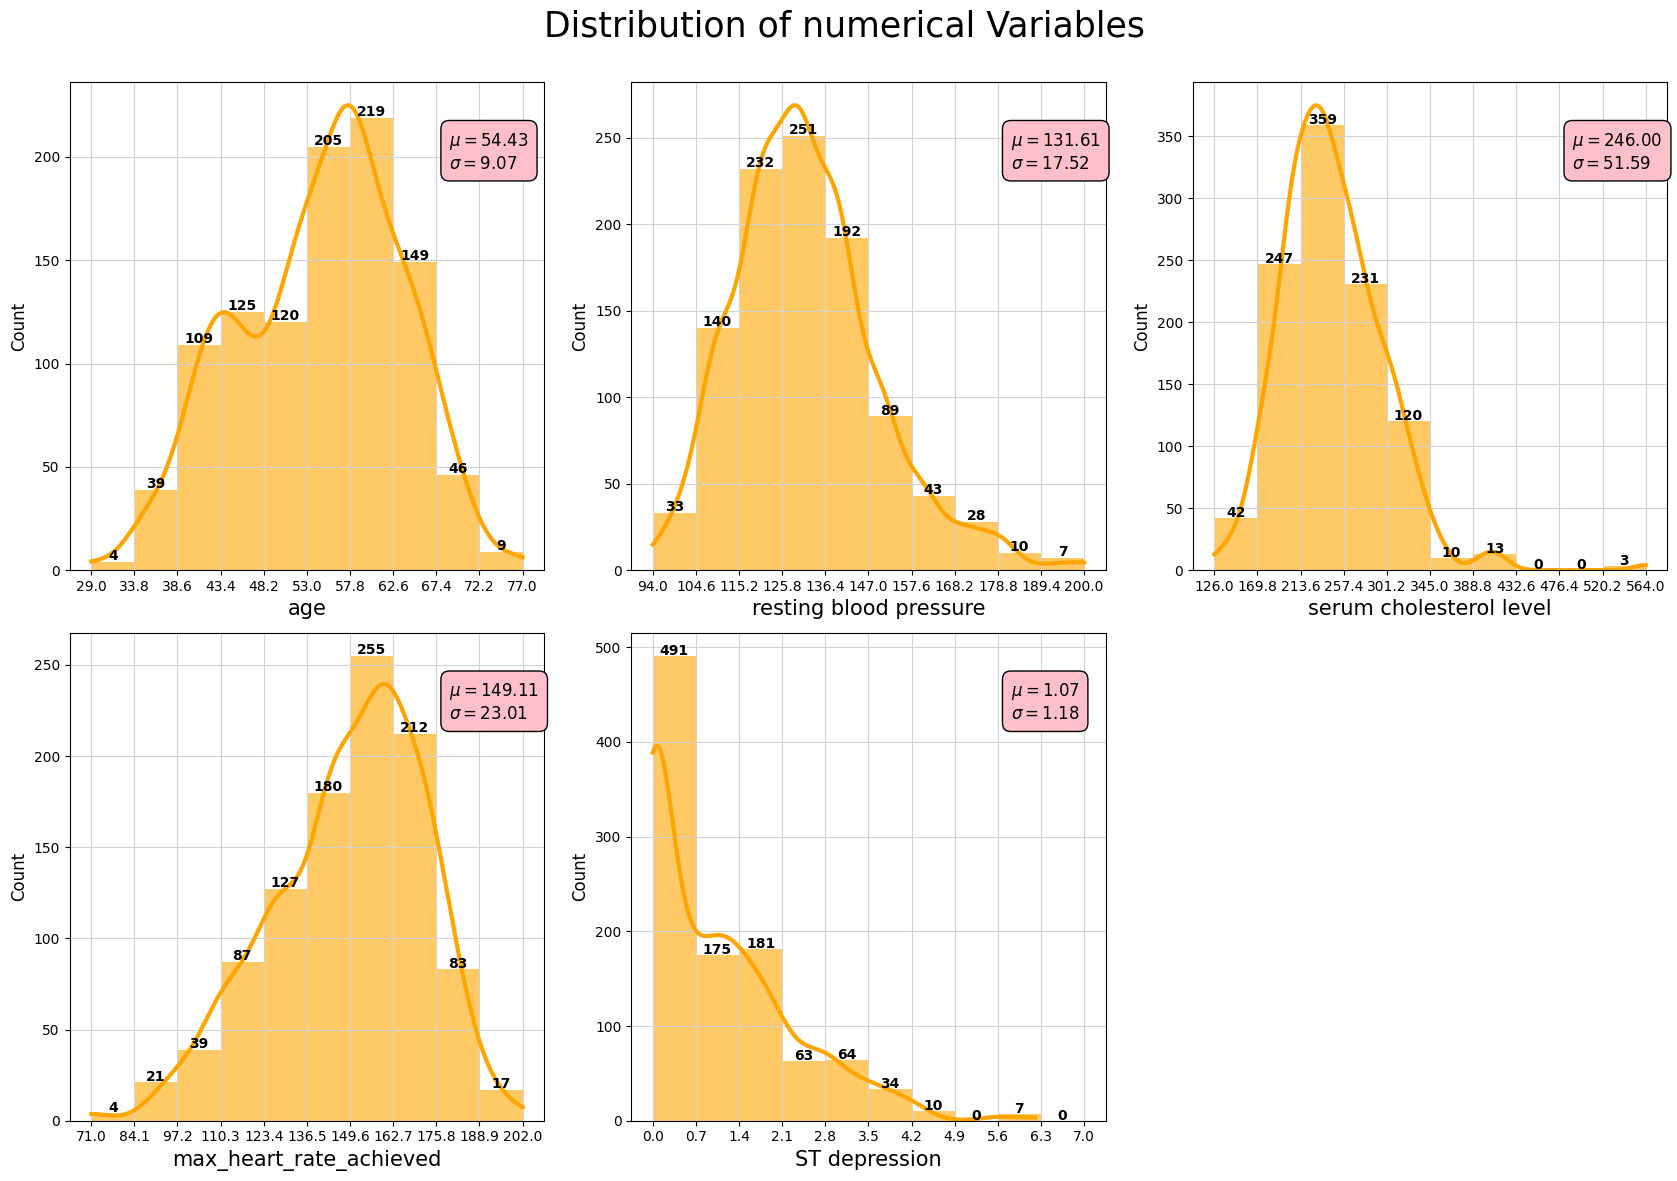

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17, 12))
for i, col in enumerate(numerical_features.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(numerical_features[col],
    range=(np.floor(numerical_features[col].min()), np.ceil(numerical_features[col].max())))
    graph = sns.histplot(data=numerical_features, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
     edgecolor="none",color='orange', alpha=0.6,line_kws={'lw': 3} )
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].grid(color='lightgrey')
    ax[1, 2].axis('off')

    for j, p in enumerate(graph.patches):
      ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha='center', fontsize=10, fontweight="bold")
    textstr = '\n'.join((
     r'$\mu=%.2f$' % numerical_features[col].mean(),
     r'$\sigma=%.2f$' %numerical_features[col].std() ))
    ax[x, y].text(0.80, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',color='black', bbox=dict(boxstyle='round', facecolor='pink', edgecolor='black', pad=0.5))
plt.suptitle('Distribution of numerical Variables', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


## **Univariate Analysis for categorical Variables**

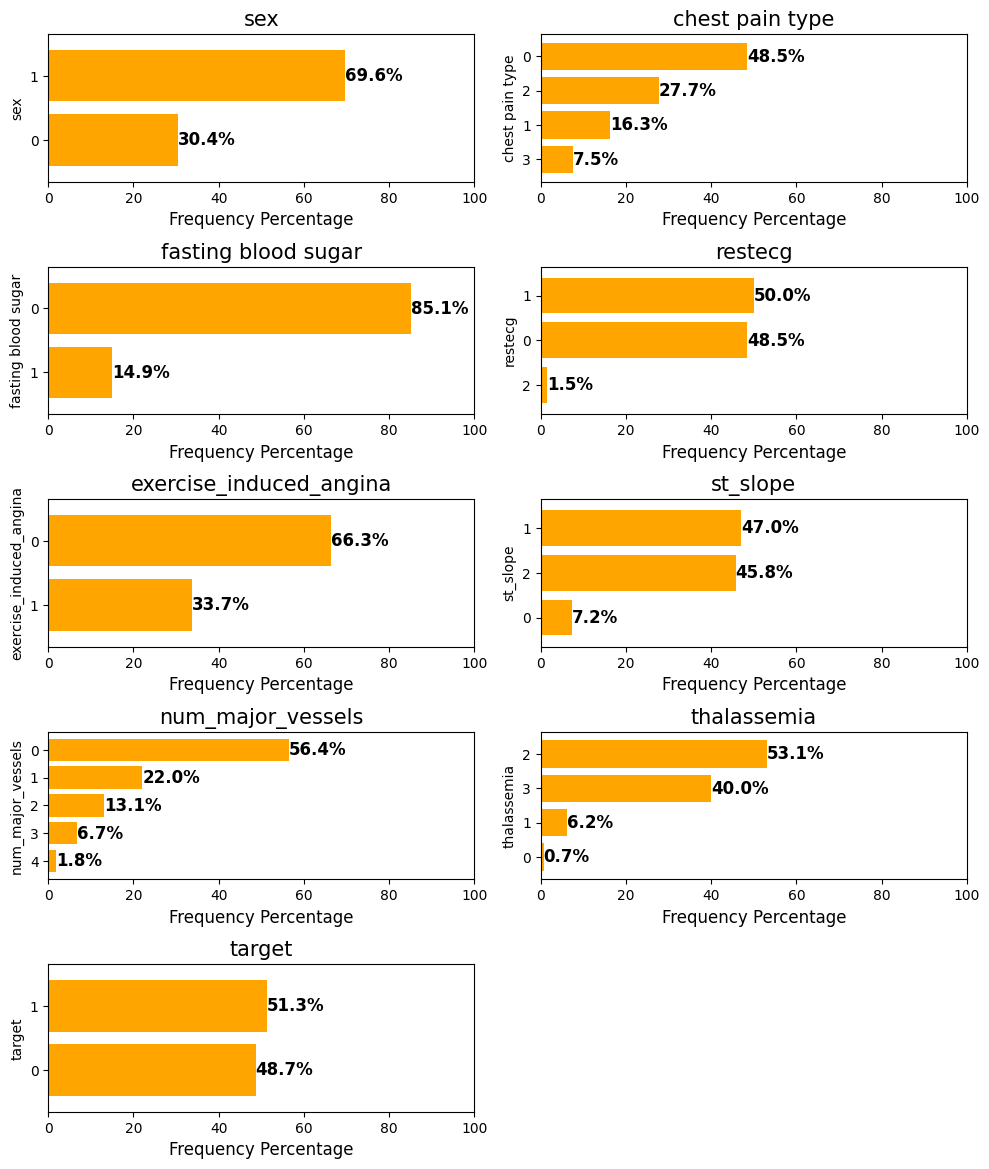

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))
for i, col in enumerate(categorical_features.columns):
    row = i // 2
    col_idx = i % 2
    value_counts = categorical_features[col].value_counts(normalize=True).mul(100).sort_values()
    value_counts.plot(kind='barh', ax=ax[row, col_idx], color='orange', width=0.8)
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, f'{round(value, 1)}%', fontsize=12, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 100])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(col, fontsize=15)
    ax[4, 1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## **Bivariate Analysis numerical Variables**

## **Bivariate Analysis For Categorical Features**

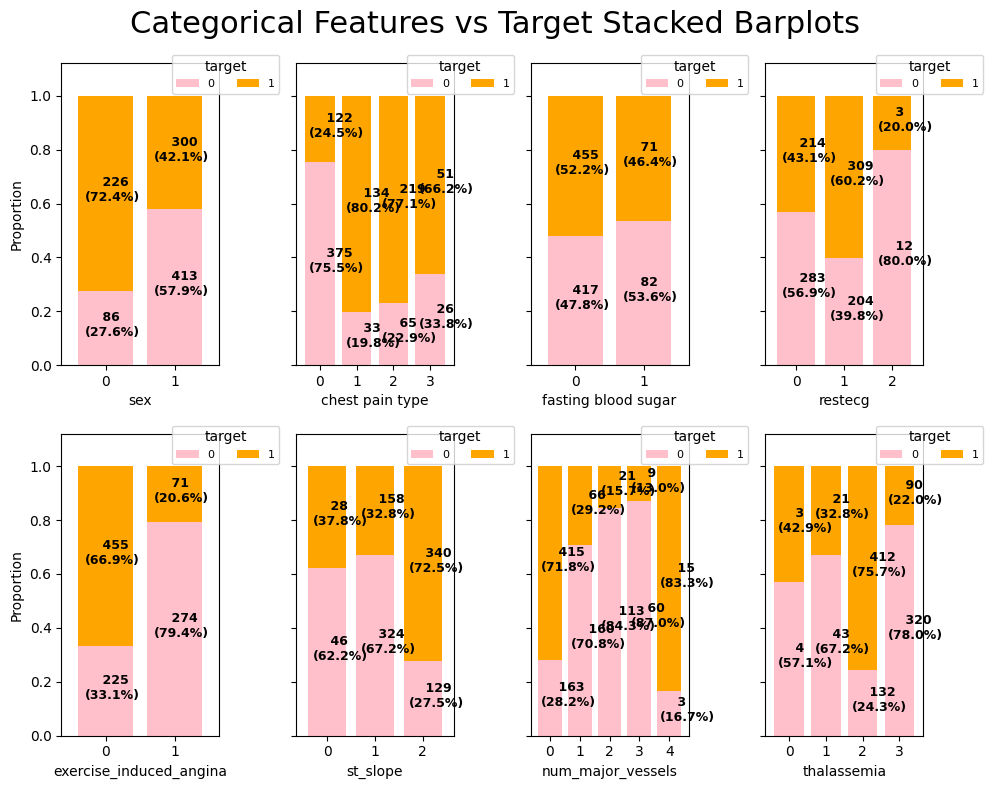

In [ ]:
categorical_features = [feature for feature in categorical_features if feature != 'target']
ig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):
    cross_tab = pd.crosstab(index=data[col], columns=data['target'])
    cross_tab_prop = pd.crosstab(index=data[col], columns=data['target'], normalize='index')
    cmp = ListedColormap(['pink', 'orange'])
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    ax[x,y].set_ylim([0,1.12])
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)


plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


## **Step 5| Outlier Treatment**

### **check for outliers using the BoxPlot for the numerical features:**

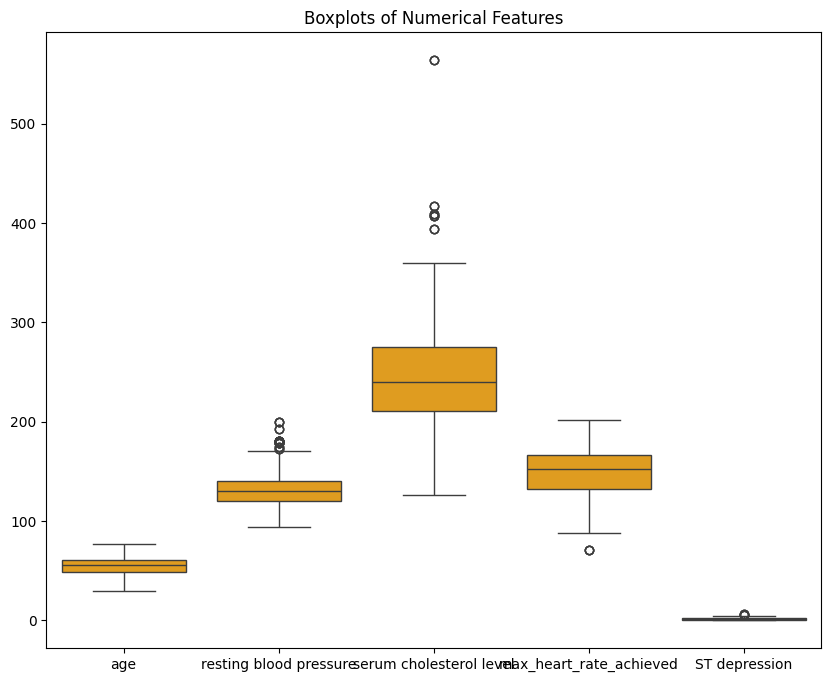

In [ ]:
numerical_features=["age","resting blood pressure","serum cholesterol level","max_heart_rate_achieved","ST depression"]
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[numerical_features],color='orange')
plt.title('Boxplots of Numerical Features')
plt.show()

### **check for outliers using the IQR method for the numerical features:**

In [ ]:
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).sum()
outliers_count_specified


age                         0
resting blood pressure     30
serum cholesterol level    16
max_heart_rate_achieved     4
ST depression               7
dtype: int64
(968, 14)


# **Preprocessing and Model Training**

### **Encoding For Categorical Features**

In [ ]:
data_encoded = pd.get_dummies(data, columns=['chest pain type', 'restecg', 'thalassemia'], drop_first=True)
features_to_convert = ["sex", "fasting blood sugar", "exercise_induced_angina", "st_slope", "num_major_vessels", 'target']
for feature in features_to_convert:
    data_encoded[feature] = data_encoded[feature].astype(int)
for column in data_encoded.columns:
    try:
        data_encoded[column] = data_encoded[column].astype(int)
    except ValueError:
        print(f"Could not convert column {column} to int")
print(data_encoded.dtypes)


age                        int64
sex                        int64
resting blood pressure     int64
serum cholesterol level    int64
fasting blood sugar        int64
max_heart_rate_achieved    int64
exercise_induced_angina    int64
ST depression              int64
st_slope                   int64
num_major_vessels          int64
target                     int64
chest pain type_1          int64
chest pain type_2          int64
chest pain type_3          int64
restecg_1                  int64
restecg_2                  int64
thalassemia_1              int64
thalassemia_2              int64
thalassemia_3              int64
dtype: object


In [ ]:
data_encoded.head(5)

age  sex  resting blood pressure  serum cholesterol level  \
0   52    1                     125                      212   
1   53    1                     140                      203   
2   70    1                     145                      174   
3   61    1                     148                      203   
4   62    0                     138                      294   

   fasting blood sugar  max_heart_rate_achieved  exercise_induced_angina  \
0                    0                      168                        0   
1                    1                      155                        1   
2                    0                      125                        1   
3                    0                      161                        0   
4                    1                      106                        0   

   ST depression  st_slope  num_major_vessels  target  chest pain type_1  \
0              1         2                  2       0                  0   
1              3         0                  0       0                  0   
2              2         0                  0       0                  0   
3              0         2                  1       0                  0   
4              1         1                  3       0                  0   

   chest pain type_2  chest pain type_3  restecg_1  restecg_2  thalassemia_1  \
0                  0                  0          1          0              0   
1                  0                  0          0          0              0   
2                  0                  0          1          0              0   
3                  0                  0          1          0              0   
4                  0                  0          1          0              0   

   thalassemia_2  thalassemia_3  
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              1              0

In [ ]:
data_encoded.columns

NameError: name 'data_encoded' is not defined

# **Step 5| Splitting the data into train and test sets**

In [ ]:
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.2)

### **Transform the oldpeak feature using Box-Cox**

In [ ]:
X_train['ST depression'] = X_train['ST depression'] + 0.001
X_test['ST depression'] = X_test['ST depression'] + 0.001

### **Box-Cox transformation For Numerical Features**

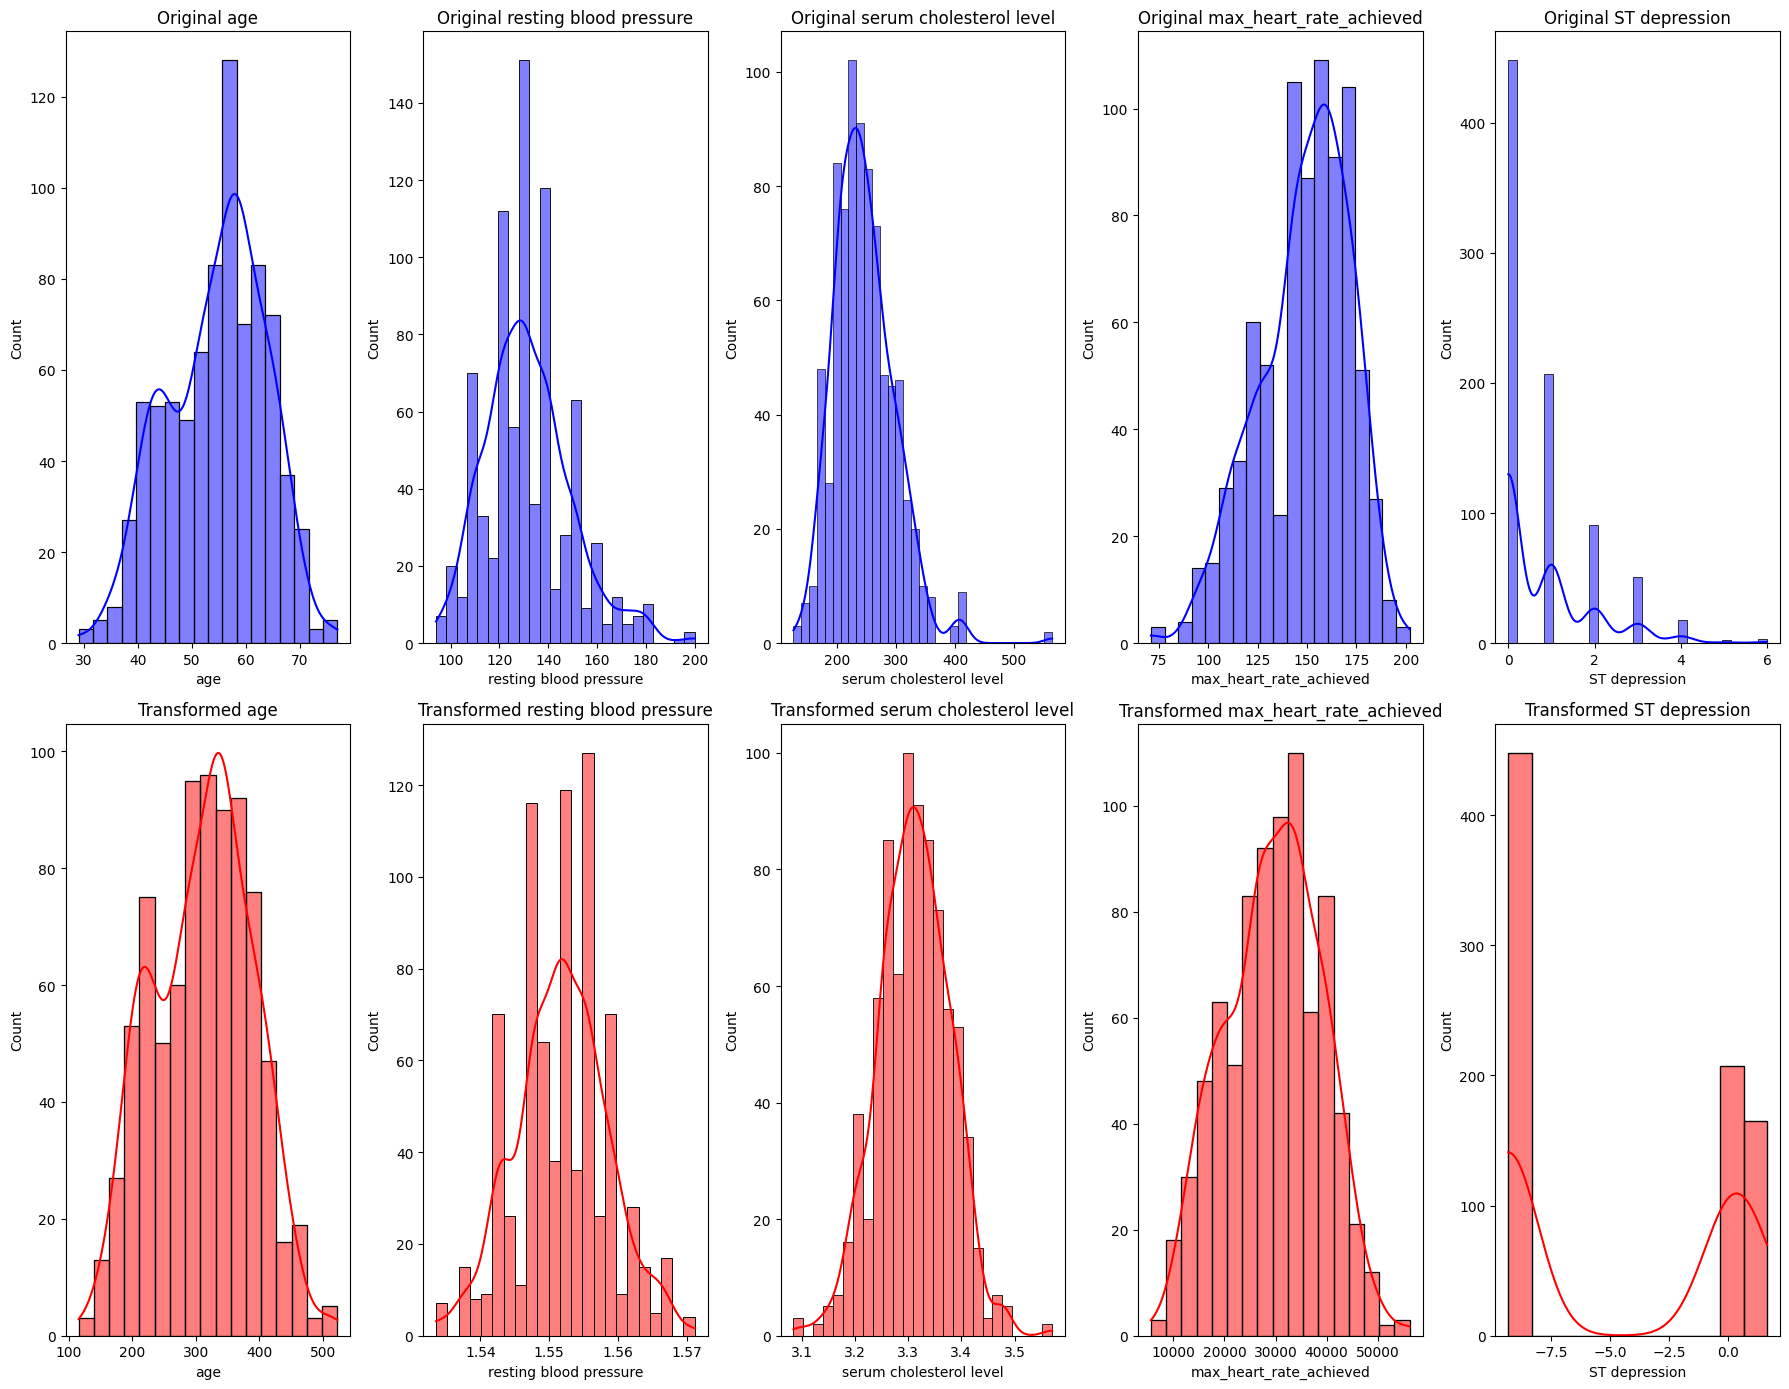

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(18,14))
for i, col in enumerate(numerical_features):
      sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='blue').set_title(f'Original {col}')
lambdas = {}
for i, col in enumerate(numerical_features):
      if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
      else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='blue').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 18)
(205, 18)
(820,)
(205,)


# **Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

# **Step 6| Model Building  and Evaluation with Hyperparameter Tuning**

# **1.DecisionTree  Model Building**

In [ ]:
DT_model = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(estimator=DT_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [ ]:
print(f"Best Parameters: {grid_search_dt.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_dt.best_score_}")

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9865853658536585


In [ ]:
best_tree = grid_search_dt.best_estimator_
test_predictions = best_tree.predict(X_test_scaled)
test_score = accuracy_score(y_test, test_predictions)
print(f"Test Score: {test_score}")
confusion_matrix(y_test, test_predictions)

Test Score: 0.9609756097560975


array([[104,   2],
       [  6,  93]])

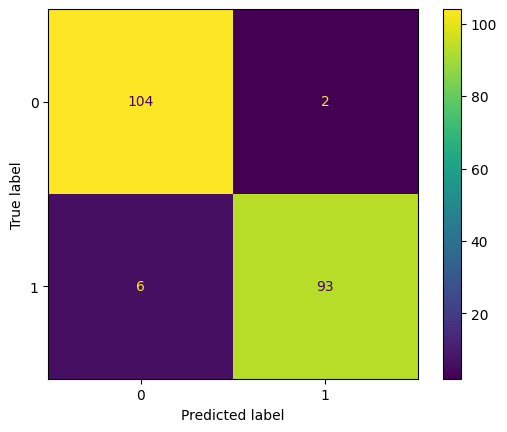

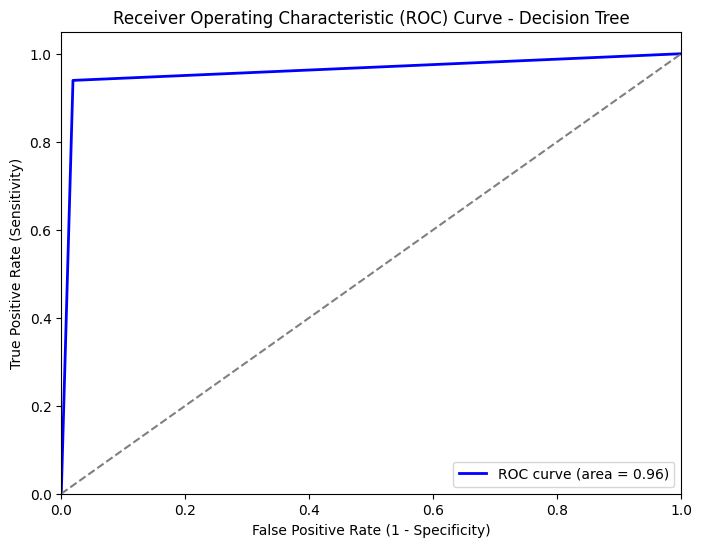

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_tree,X_test_scaled,y_test)

probs = best_tree.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print("classification report for testing data set\n\n",classification_report(y_test, test_predictions))
print("classification report for traing data set\n\n",classification_report(y_train, best_tree.predict(X_train_scaled)))

classification report for testing data set

               precision    recall  f1-score   support

           0       0.95      0.98      0.96       106
           1       0.98      0.94      0.96        99

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

classification report for traing data set

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       427

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



### **Decision tree report**

In [ ]:
print("Decision tree report:\n")
print(f"Accuracy: {accuracy_score(y_test, test_predictions)}")
print(f"Recall: {recall_score(y_test, test_predictions)}")
print(f"Precision: {precision_score(y_test, test_predictions)}")
print(f"F1 Score: {f1_score(y_test, test_predictions)}")


Decision tree report:

Accuracy: 0.9609756097560975
Recall: 0.9393939393939394
Precision: 0.9789473684210527
F1 Score: 0.9587628865979383


# **2.LogisticRegression Model Building**

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 10, 100]}
log_reg = LogisticRegression()
grid_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100]}, scoring='accuracy')

In [ ]:
best_C = grid_lr.best_params_['C']
best_C

0.01

In [ ]:
y_pred_lr=grid_lr.predict(X_test_scaled)
y_pred_lr

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1])

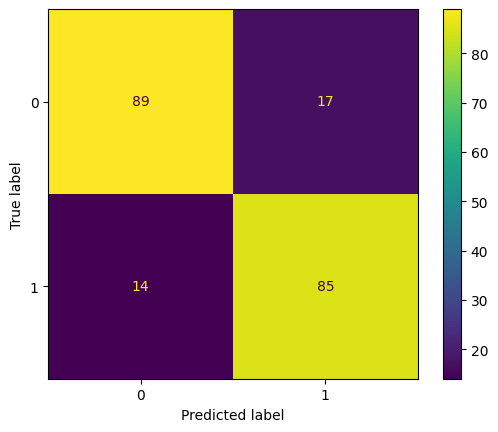

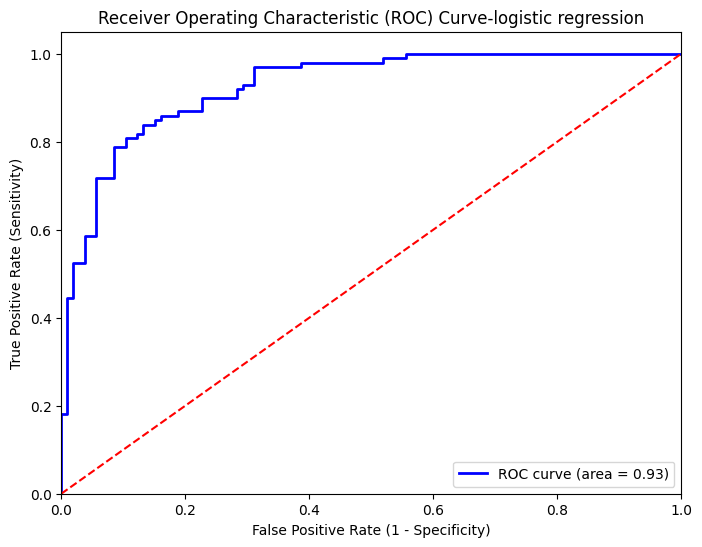

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_lr,X_test_scaled,y_test)
probs = grid_lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve-logistic regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("classification report for trin data set\n\n",classification_report(y_train, grid_lr.predict(X_train_scaled)))
print("classification report for test data set\n\n",classification_report(y_test,y_pred_lr))

classification report for trin data set

               precision    recall  f1-score   support

           0       0.87      0.82      0.84       393
           1       0.84      0.89      0.86       427

    accuracy                           0.85       820
   macro avg       0.86      0.85      0.85       820
weighted avg       0.86      0.85      0.85       820

classification report for test data set

               precision    recall  f1-score   support

           0       0.86      0.84      0.85       106
           1       0.83      0.86      0.85        99

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



### **Logistic Regression Report:**

In [ ]:
print("Logistic Regression:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred_lr)}")

Logistic Regression:

Accuracy: 0.848780487804878
Recall: 0.8585858585858586
Precision: 0.8333333333333334
F1 Score: 0.8457711442786069
Confusion Matrix:
 [[89 17]
 [14 85]]


# **3.Support Vector Machine Model Building**

In [ ]:
classifier = SVC(probability=True, random_state=101)
svc_train_clf=classifier.fit(X_train_scaled, y_train)
svc_pred = classifier.predict(X_test_scaled)


Accuracy : 0.95


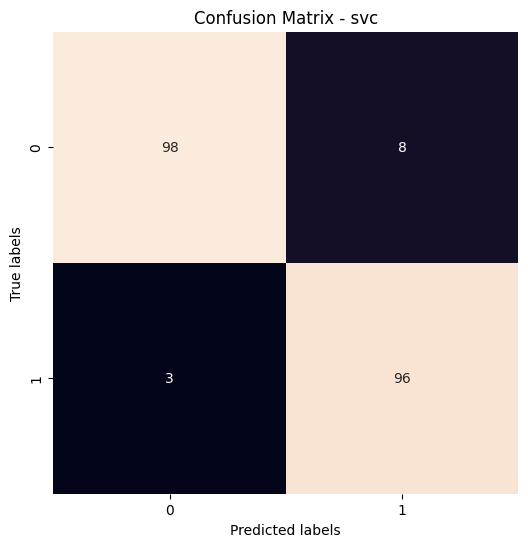

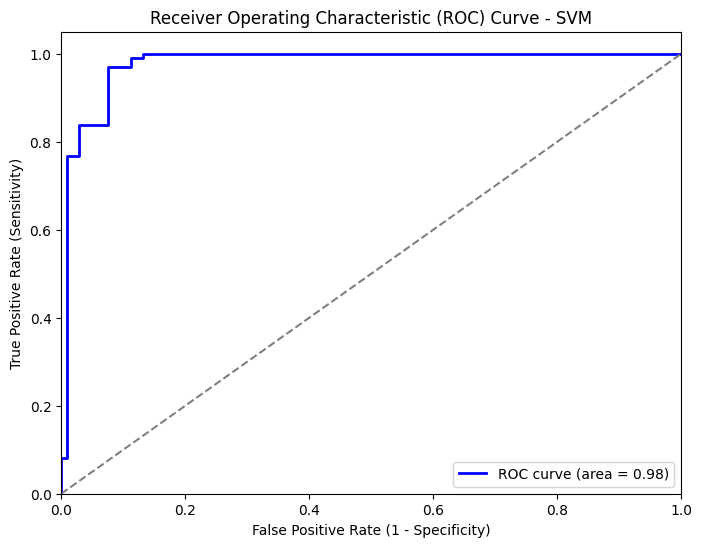

In [ ]:
accuracy = accuracy_score(y_test, svc_pred)
print(f'Accuracy : {accuracy:.2f}')
cm=confusion_matrix(y_test, svc_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - svc')
plt.show()

scores = classifier.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()


### **svc prediction Report**

In [ ]:
print("svc prediction:\n")
print(f"Accuracy: {accuracy_score(y_test,svc_pred )}")
print(f"Recall: {recall_score(y_test, svc_pred)}")
print(f"Precision: {precision_score(y_test, svc_pred)}")
print(f"F1 Score: {f1_score(y_test, svc_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, svc_pred)}")

svc prediction:

Accuracy: 0.9463414634146341
Recall: 0.9696969696969697
Precision: 0.9230769230769231
F1 Score: 0.9458128078817735
Confusion Matrix:
 [[98  8]
 [ 3 96]]


In [ ]:
print("classification report for test data set\n\n",classification_report(y_test,svc_pred))
print("classification report for train data set\n\n",classification_report(y_train,svc_train_clf.predict(X_train_scaled)))

classification report for test data set

               precision    recall  f1-score   support

           0       0.97      0.92      0.95       106
           1       0.92      0.97      0.95        99

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

classification report for train data set

               precision    recall  f1-score   support

           0       0.95      0.93      0.94       393
           1       0.94      0.96      0.95       427

    accuracy                           0.94       820
   macro avg       0.94      0.94      0.94       820
weighted avg       0.94      0.94      0.94       820



# **4.RandomForest Model Evaluation**

In [ ]:
rf = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
print(f"Best parameters found: {grid_search_rf.best_params_}")
print(f"Best accuracy: {grid_search_rf.best_score_}")

best_rf = grid_search_rf.best_estimator_
RF_pred = best_rf.predict(X_test_scaled)
RF_pred


Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy: 0.9878048780487804


array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1])

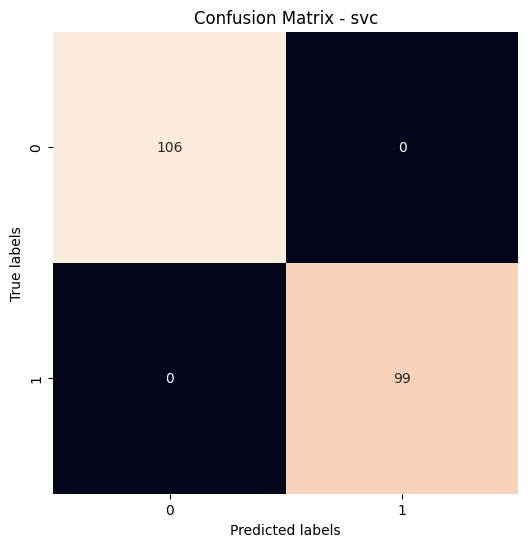

Accuracy : 1.00


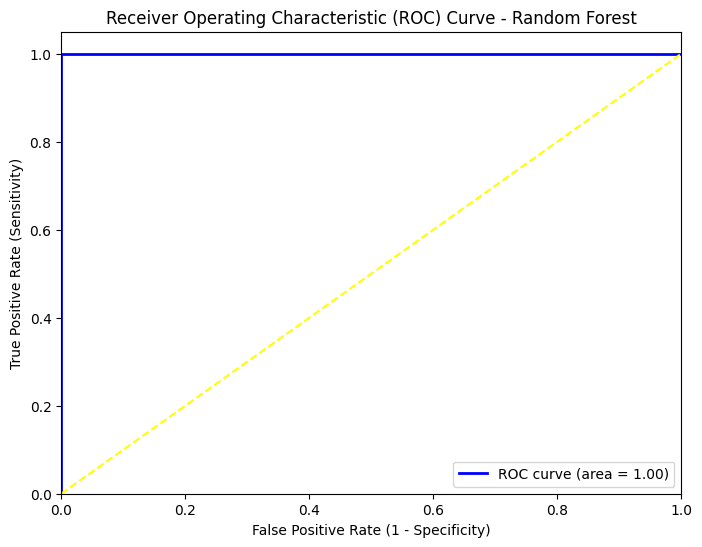

In [ ]:
cm=confusion_matrix(y_test, RF_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - svc')
plt.show()
accuracy = accuracy_score(y_test, RF_pred)
print(f'Accuracy : {accuracy:.2f}')

probs = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


### **RandomForest Report**

In [ ]:
print("RandomForest Report:\n")
print(f"Accuracy: {accuracy_score(y_test, RF_pred)}")
print(f"Recall: {recall_score(y_test, RF_pred)}")
print(f"Precision: {precision_score(y_test, RF_pred)}")
print(f"F1 Score: {f1_score(y_test, RF_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,RF_pred)}")

RandomForest Report:

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[106   0]
 [  0  99]]


In [ ]:
print("classification report for train data set\n\n",classification_report(y_train, best_rf.predict(X_train_scaled)))
print("classification report for test data set\n\n",classification_report(y_test, RF_pred))

classification report for train data set

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       427

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820

classification report for test data set

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        99

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



# **5. KNN Model Building**

In [ ]:
Pipeline([("scaler",StandardScaler()),("KNN",KNeighborsClassifier())])


Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [ ]:
param_grid_knn={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
grid_knn=GridSearchCV(cv=5,estimator=Pipeline([("scaler",StandardScaler()),("knn",KNeighborsClassifier())]),param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
        scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [ ]:
y_pred_knn=grid_knn.predict(X_test_scaled)
y_pred_knn

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1])

In [ ]:
confusion_matrix(y_test, y_pred_knn)
print("classification report for train data set\n\n",classification_report(y_test,y_pred_knn))
print("classification report for test data set\n\n",classification_report(y_train, grid_knn.predict(X_train_scaled)))

classification report for train data set

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       106
           1       1.00      0.97      0.98        99

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.99       205
weighted avg       0.99      0.99      0.99       205

classification report for test data set

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       427

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



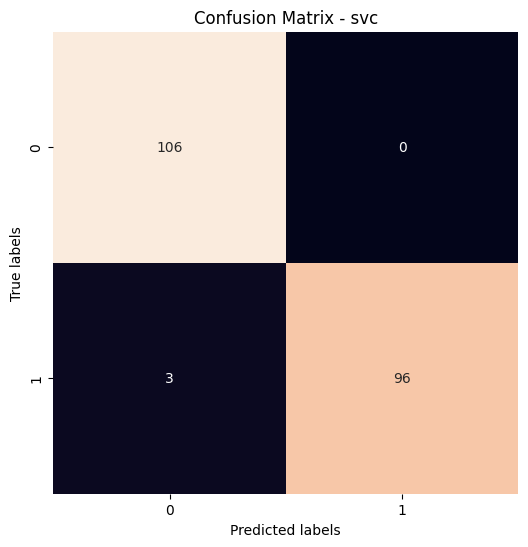

Accuracy : 0.99


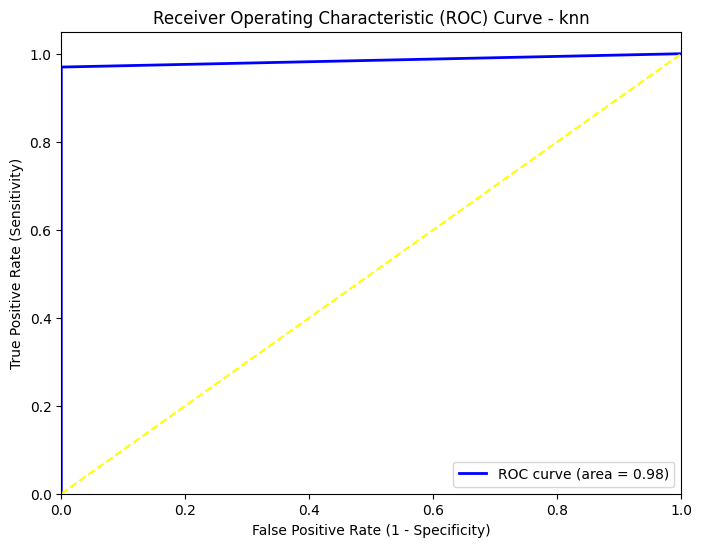

In [ ]:
cm=confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - svc')
plt.show()
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy : {accuracy:.2f}')

probs = grid_knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - knn')
plt.legend(loc="lower right")
plt.show()

### **knn prediction Report**

In [ ]:
print("knn prediction:")
print(f"Accuracy: {accuracy_score(y_test,y_pred_knn )}")
print(f"Recall: {recall_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_knn)}")

knn prediction:
Accuracy: 0.9853658536585366
Recall: 0.9696969696969697
Precision: 1.0
F1 Score: 0.9846153846153847
Confusion Matrix:
 [[106   0]
 [  3  96]]


# **conclusion :**

## **Final Result:**

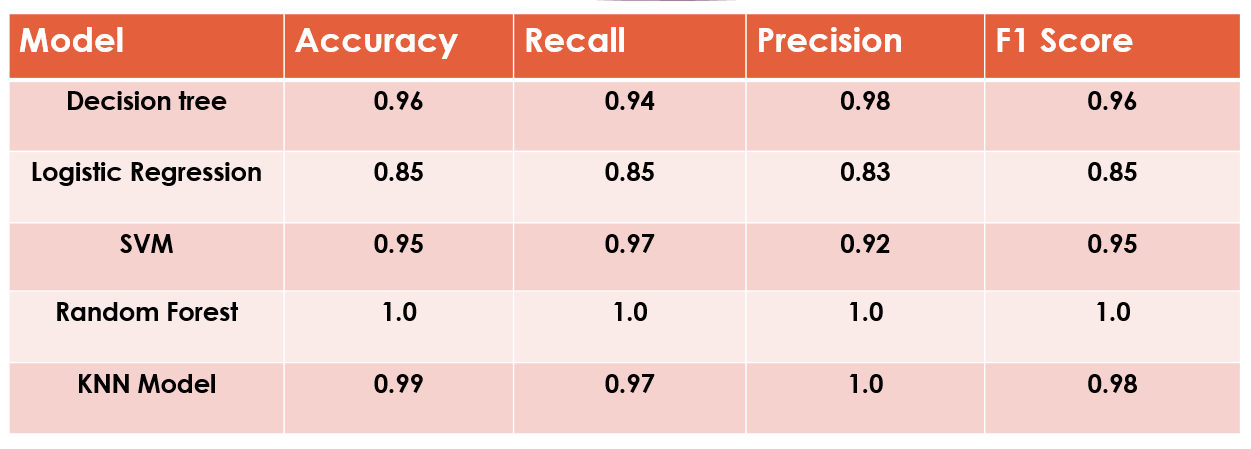


## **All models demonstrate exceptional performance in predicting the presence  of heart disease. However, the Random Forest model stands out due to its perfect scores across all metrics, including accuracy, recall, precision, and F1 score. It achieved flawless predictions with no false negatives or false positives, making it the ideal choice for this project. Given the project's objective to prioritize sensitivity and minimize the risk of misdiagnosing individuals with heart disease, the Random Forest model is recommended for deployment.**